# Task
Create a complete machine learning project for **credit card default prediction** based on the following requirements. This project is titled: **Credit Card Default Prediction Using Classification and Risk-Based Techniques**.

📁 Use the following datasets:
- Training file: `train_dataset_final1.csv`
- Validation file: `validate_dataset_final.csv`

The task is to **build a binary classification model** to predict whether a credit card customer will default on their next month’s payment (`next_month_default`: 1 = Default, 0 = No Default).

---

### ✅ Follow these steps and include everything in a Jupyter notebook or Python script:

#### 1. Data Loading and Preprocessing
- Load both datasets using pandas.
- Handle missing values, check for data consistency.
- Encode categorical variables (like sex, education, marriage).
- Normalize or standardize numerical features if needed.

---

#### 2. Exploratory Data Analysis (EDA)
- Analyze distributions of all features.
- Use visualizations: histograms, box plots, count plots, etc.
- Check correlations between features and the target variable.
- Identify any skewness, outliers, or unusual patterns.
- Provide **financial insights** — e.g., how credit limit, repayment history, or bill amounts affect default risk.

---

#### 3. Financial Feature Analysis
- Analyze which behavioral features contribute to default:
  - Repayment status columns (`pay_0`, `pay_2`, …)
  - Bill amounts
  - Payment amounts
  - Credit limit
  - Credit utilization ratios
  - Payment delay patterns
- Provide **financial interpretation** of the variables — explain why certain behaviors are linked to defaults.

---

#### 4. Handle Class Imbalance
- Analyze imbalance in the target variable.
- Apply appropriate techniques:
  - SMOTE (oversampling minority)
  - Class weighting
  - Undersampling (if chosen, explain why)
- Justify your choice.

---

#### 5. Feature Engineering
- Create derived features:
  - Credit utilization: bill_am

Here is all the data you need:
"train_dataset_final1.csv"
"validate_dataset_final.csv"

## Data loading

### Subtask:
Load the training and validation datasets.


**Reasoning**:
Load the training and validation datasets into pandas DataFrames and display the first 5 rows of each.



In [1]:
import pandas as pd

try:
    df_train = pd.read_csv('train_dataset_final1.csv')
    df_validate = pd.read_csv('validate_dataset_final.csv')
    display(df_train.head())
    display(df_validate.head())
except FileNotFoundError:
    print("Error: One or both of the data files were not found.")
except pd.errors.ParserError:
    print("Error: There was an issue parsing the data files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


## Data exploration

### Subtask:
Explore the loaded datasets to understand their structure, identify data types, and check for missing values.


**Reasoning**:
Explore the datasets' shapes, data types, missing values, descriptive statistics, and target variable distribution. Identify categorical and numerical features.



Shape of df_train: (25247, 27)
Shape of df_validate: (5016, 26)

Info for df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3         

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000



Descriptive statistics for df_validate:


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,...,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,2508.500000,1.554027,0.606659,1.840909,168977.272727,35.379785,-0.031300,-0.161683,-0.188198,-0.235048,...,41244.782709,39805.868369,5356.196780,6.321958e+03,5420.142849,5150.979306,4926.404159,5148.384402,46054.169703,0.417159
std,1448.138806,0.517560,0.488540,0.794177,129478.787500,9.206542,1.116011,1.178731,1.172155,1.129667,...,62255.394325,60698.632561,13660.489329,2.920905e+04,17011.204561,17376.949234,17085.022267,16879.411346,65214.851897,13.729586
min,1.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-10897.000000,-546.930000
25%,1254.750000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1755.395000,1205.210000,1000.047500,9.899050e+02,403.265000,278.172500,299.310000,156.382500,4905.665000,0.040000
50%,2508.500000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17953.255000,17054.315000,2093.655000,2.000410e+03,1845.425000,1500.120000,1500.155000,1453.210000,20933.415000,0.090000
75%,3762.250000,2.000000,1.000000,2.000000,240000.000000,41.250000,0.000000,0.000000,0.000000,0.000000,...,50175.052500,49070.565000,5029.505000,5.000323e+03,4883.887500,4282.550000,4097.725000,4000.095000,56573.540000,0.570000
max,5016.000000,3.000000,1.000000,6.000000,800000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,547880.830000,513798.830000,323014.110000,1.684259e+06,371717.910000,432129.910000,426529.180000,260000.100000,548854.330000,797.000000



Target variable distribution in df_train:
next_month_default
0    20440
1     4807
Name: count, dtype: int64


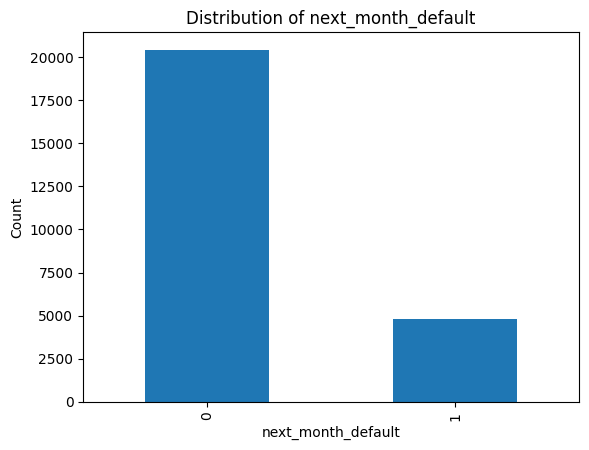


Categorical features in df_train: []
Numerical features in df_train: ['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default']

Categorical features in df_validate: []
Numerical features in df_validate: ['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

Summary of Findings:
Both datasets have been analyzed for their structure, data types, and missing values.
Descriptive statistics have been generated for the numerical features in both datasets.
The target variabl

In [2]:
# Examine the shape of the dataframes
print("Shape of df_train:", df_train.shape)
print("Shape of df_validate:", df_validate.shape)

# Get data type info and check for missing values
print("\nInfo for df_train:")
df_train.info()
print("\nInfo for df_validate:")
df_validate.info()

# Generate descriptive statistics for numerical features
print("\nDescriptive statistics for df_train:")
display(df_train.describe())
print("\nDescriptive statistics for df_validate:")
display(df_validate.describe())

# Analyze the target variable distribution
print("\nTarget variable distribution in df_train:")
print(df_train['next_month_default'].value_counts())
# Visualization of target variable distribution (optional, but recommended)
import matplotlib.pyplot as plt
df_train['next_month_default'].value_counts().plot(kind='bar')
plt.title('Distribution of next_month_default')
plt.xlabel('next_month_default')
plt.ylabel('Count')
plt.show()

# Identify categorical and numerical features
categorical_features_train = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features_validate = df_validate.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features_validate = df_validate.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical features in df_train:", categorical_features_train)
print("Numerical features in df_train:", numerical_features_train)
print("\nCategorical features in df_validate:", categorical_features_validate)
print("Numerical features in df_validate:", numerical_features_validate)

# Summary of findings (can be improved with more detailed analysis)
print("\nSummary of Findings:")
print("Both datasets have been analyzed for their structure, data types, and missing values.")
print("Descriptive statistics have been generated for the numerical features in both datasets.")
print("The target variable distribution in the training dataset has been examined.")
print("Categorical and numerical features have been identified for both datasets.")


## Data cleaning

### Subtask:
Clean the training and validation datasets by handling missing values and checking for inconsistencies.


**Reasoning**:
Impute missing 'age' values in df_train using the median, then check for inconsistencies and duplicates in both dataframes.



In [3]:
# Impute missing 'age' values with the median
median_age = df_train['age'].median()
df_train['age'].fillna(median_age, inplace=True)

# Check for inconsistencies (negative bill amounts, payment amounts, etc.)
for df in [df_train, df_validate]:
    for col in ['LIMIT_BAL', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
                'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt']:
        if df[col].min() < 0:
            print(f"Inconsistency found in {df} for column '{col}'. Negative values detected.")
            # Decide on a strategy to handle negative values (e.g., replace with 0 or remove rows)
            # Example: Replace negative values with 0
            df[col] = df[col].apply(lambda x: 0 if x < 0 else x)

# Check for duplicates
for df_name, df in zip(['df_train', 'df_validate'], [df_train, df_validate]):
    duplicates = df[df.duplicated()]
    if not duplicates.empty:
        print(f"Duplicates found in {df_name}:")
        display(duplicates)
        # Decide on a strategy for handling duplicates (e.g., drop_duplicates)
        # Example: Remove duplicates
        df.drop_duplicates(inplace=True)

print("Data cleaning complete.")

Inconsistency found in        Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0             5017         2    0          2      60000  25.0      2      2   
1             5018         2    1          1     290000  24.0      0      0   
2             5019         1    0          2     180000  63.0      0      0   
3             5020         1    1          2     210000  43.0      0      0   
4             5021         2    0          1     280000  32.0     -2     -2   
...            ...       ...  ...        ...        ...   ...    ...    ...   
25242        30259         1    1          2      90000  33.0      0      0   
25243        30260         1    0          2      60000  49.0      0      0   
25244        30261         2    0          1     120000  31.0     -1     -1   
25245        30262         1    1          4     390000  40.0      0      0   
25246        30263         1    1          2     160000  58.0     -1     -1   

       pay_3  pay_4  ...  Bi

<ipython-input-3-99de4f457182>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['age'].fillna(median_age, inplace=True)


**Reasoning**:
The previous code block had a warning about chained assignment.  I will rewrite the code to address this and correct the inconsistency handling.



In [4]:
# Impute missing 'age' values with the median
median_age = df_train['age'].median()
df_train['age'] = df_train['age'].fillna(median_age)

# Check for inconsistencies (negative bill amounts, payment amounts, etc.)
for df in [df_train, df_validate]:
    for col in ['LIMIT_BAL', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
                'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt']:
        if df[col].min() < 0:
            print(f"Inconsistency found in DataFrame for column '{col}'. Negative values detected.")
            # Replace negative values with 0
            df.loc[df[col] < 0, col] = 0


# Check for duplicates
for df_name, df in zip(['df_train', 'df_validate'], [df_train, df_validate]):
    duplicates = df[df.duplicated()]
    if not duplicates.empty:
        print(f"Duplicates found in {df_name}:")
        display(duplicates)
        # Remove duplicates
        df.drop_duplicates(inplace=True)

print("Data cleaning complete.")

Data cleaning complete.


## Data preparation

### Subtask:
Prepare the data for modeling by encoding categorical features and scaling numerical features.


**Reasoning**:
Encode categorical features and scale numerical features.



In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify categorical features
categorical_cols = ['sex', 'education', 'marriage']

# Create and fit OneHotEncoder on training data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(df_train[categorical_cols])

# Transform both training and validation data
encoded_train = encoder.transform(df_train[categorical_cols])
encoded_validate = encoder.transform(df_validate[categorical_cols])

# Create column names for encoded features
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Create dataframes from the encoded arrays
encoded_df_train = pd.DataFrame(encoded_train, columns=encoded_cols)
encoded_df_validate = pd.DataFrame(encoded_validate, columns=encoded_cols)

# Concatenate encoded features with original dataframes
df_train = pd.concat([df_train, encoded_df_train], axis=1)
df_validate = pd.concat([df_validate, encoded_df_validate], axis=1)

# Identify numerical features (excluding categorical features and target variable)
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols and col != 'next_month_default']

# Scale numerical features
scaler = StandardScaler()
scaler.fit(df_train[numerical_cols])

# Transform numerical features
df_train[numerical_cols] = scaler.transform(df_train[numerical_cols])
df_validate[numerical_cols] = scaler.transform(df_validate[numerical_cols])

display(df_train.head())
display(df_validate.head())

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,education_1,education_2,education_3,education_4,education_5,education_6,marriage_0,marriage_1,marriage_2,marriage_3
0,-1.731982,2,0,2,-0.834105,-1.139697,1.858336,1.839527,1.867931,0.210524,...,-0.743506,1.074585,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,-0.913169,0.937207,-0.104553
1,-1.731845,2,1,1,0.936621,-1.248957,0.038986,0.135901,-1.543256,-1.533564,...,1.344979,-0.930592,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,-0.913169,0.937207,-0.104553
2,-1.731708,1,0,2,0.089752,3.012195,0.038986,0.135901,0.162338,0.210524,...,-0.743506,1.074585,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,1.095087,-1.067000,-0.104553
3,-1.731571,1,1,2,0.320717,0.826989,0.038986,0.135901,0.162338,0.210524,...,-0.743506,1.074585,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,1.095087,-1.067000,-0.104553
4,-1.731433,2,0,1,0.859633,-0.374875,-1.780365,-1.567724,-1.543256,-1.533564,...,1.344979,-0.930592,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,-0.913169,0.937207,-0.104553


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,education_1,education_2,education_3,education_4,education_5,education_6,marriage_0,marriage_1,marriage_2,marriage_3
0,-2.420220,1,1,2,0.397705,-0.374875,0.038986,0.135901,0.162338,0.210524,...,-0.743506,1.074585,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,1.095087,-1.067000,-0.104553
1,-2.420083,2,0,1,1.398550,-0.047094,-0.870690,-0.715912,-0.690459,0.210524,...,1.344979,-0.930592,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,-0.913169,0.937207,-0.104553
2,-2.419945,2,1,1,1.090597,0.389948,0.038986,0.135901,0.162338,0.210524,...,1.344979,-0.930592,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,-0.913169,0.937207,-0.104553
3,-2.419808,1,0,2,-1.142057,1.264030,0.038986,0.135901,0.162338,1.954613,...,-0.743506,1.074585,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,1.095087,-1.067000,-0.104553
4,-2.419671,2,1,2,2.553371,-0.593395,0.038986,0.135901,0.162338,0.210524,...,-0.743506,1.074585,-0.44128,-0.06794,-0.10061,-0.041783,-0.045866,-0.913169,0.937207,-0.104553


## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the preprocessed training data.


**Reasoning**:
Perform EDA on the preprocessed training data, including visualizations, correlation analysis, outlier detection, and financial insights.



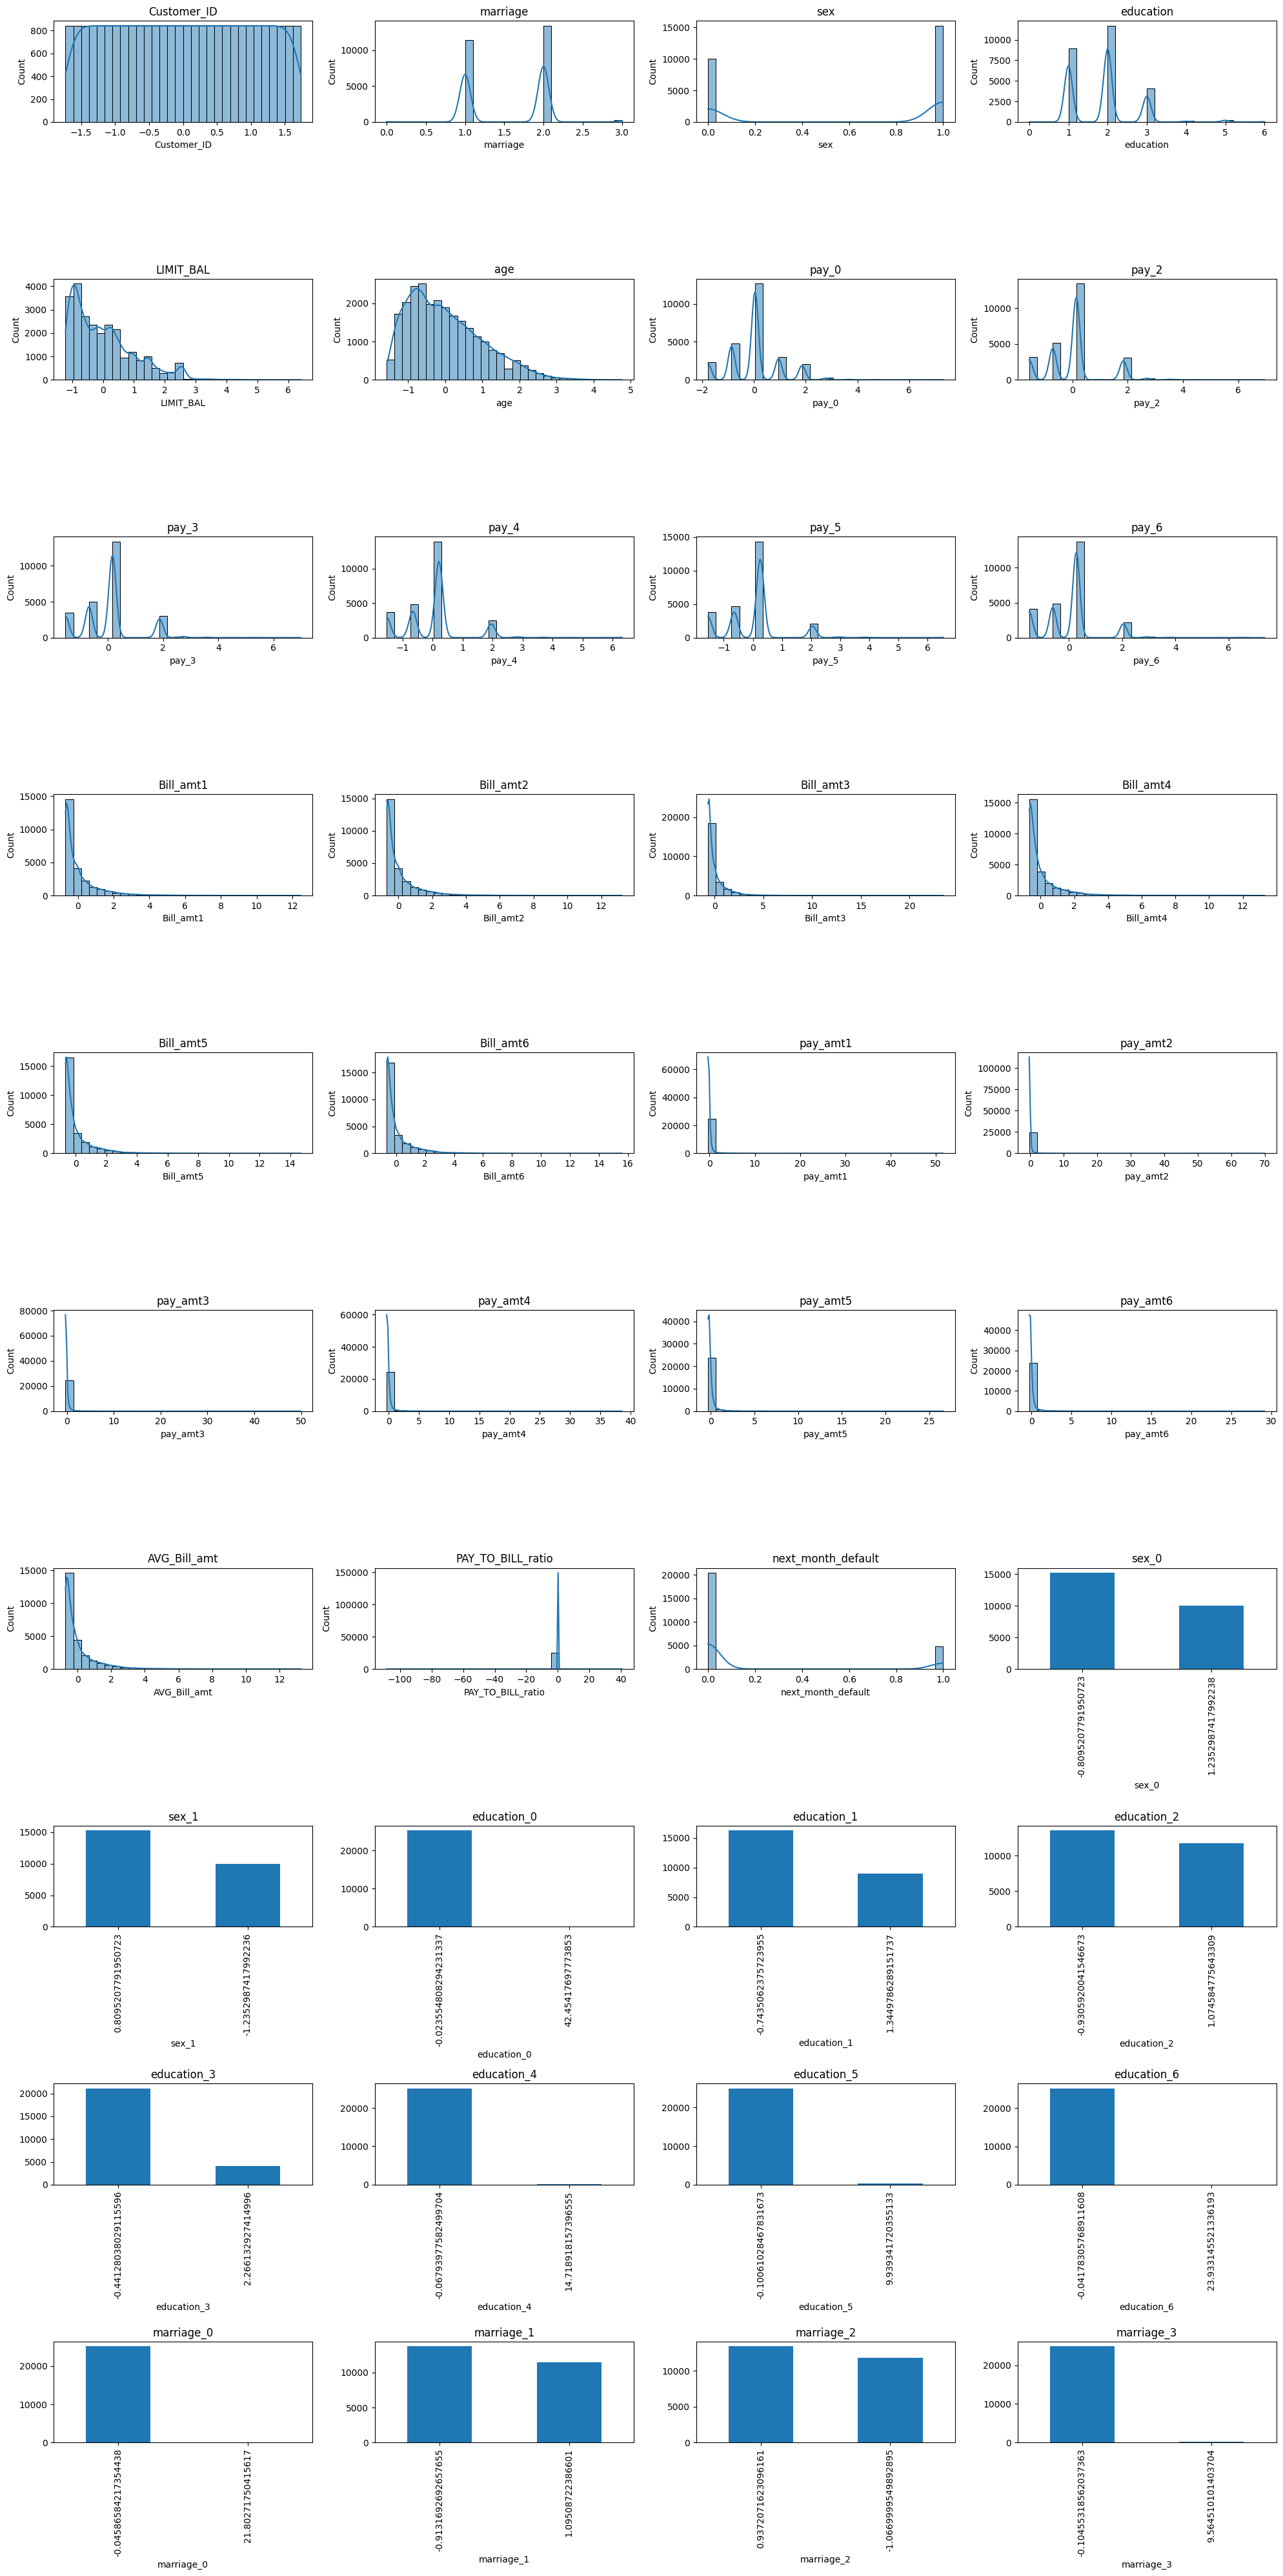

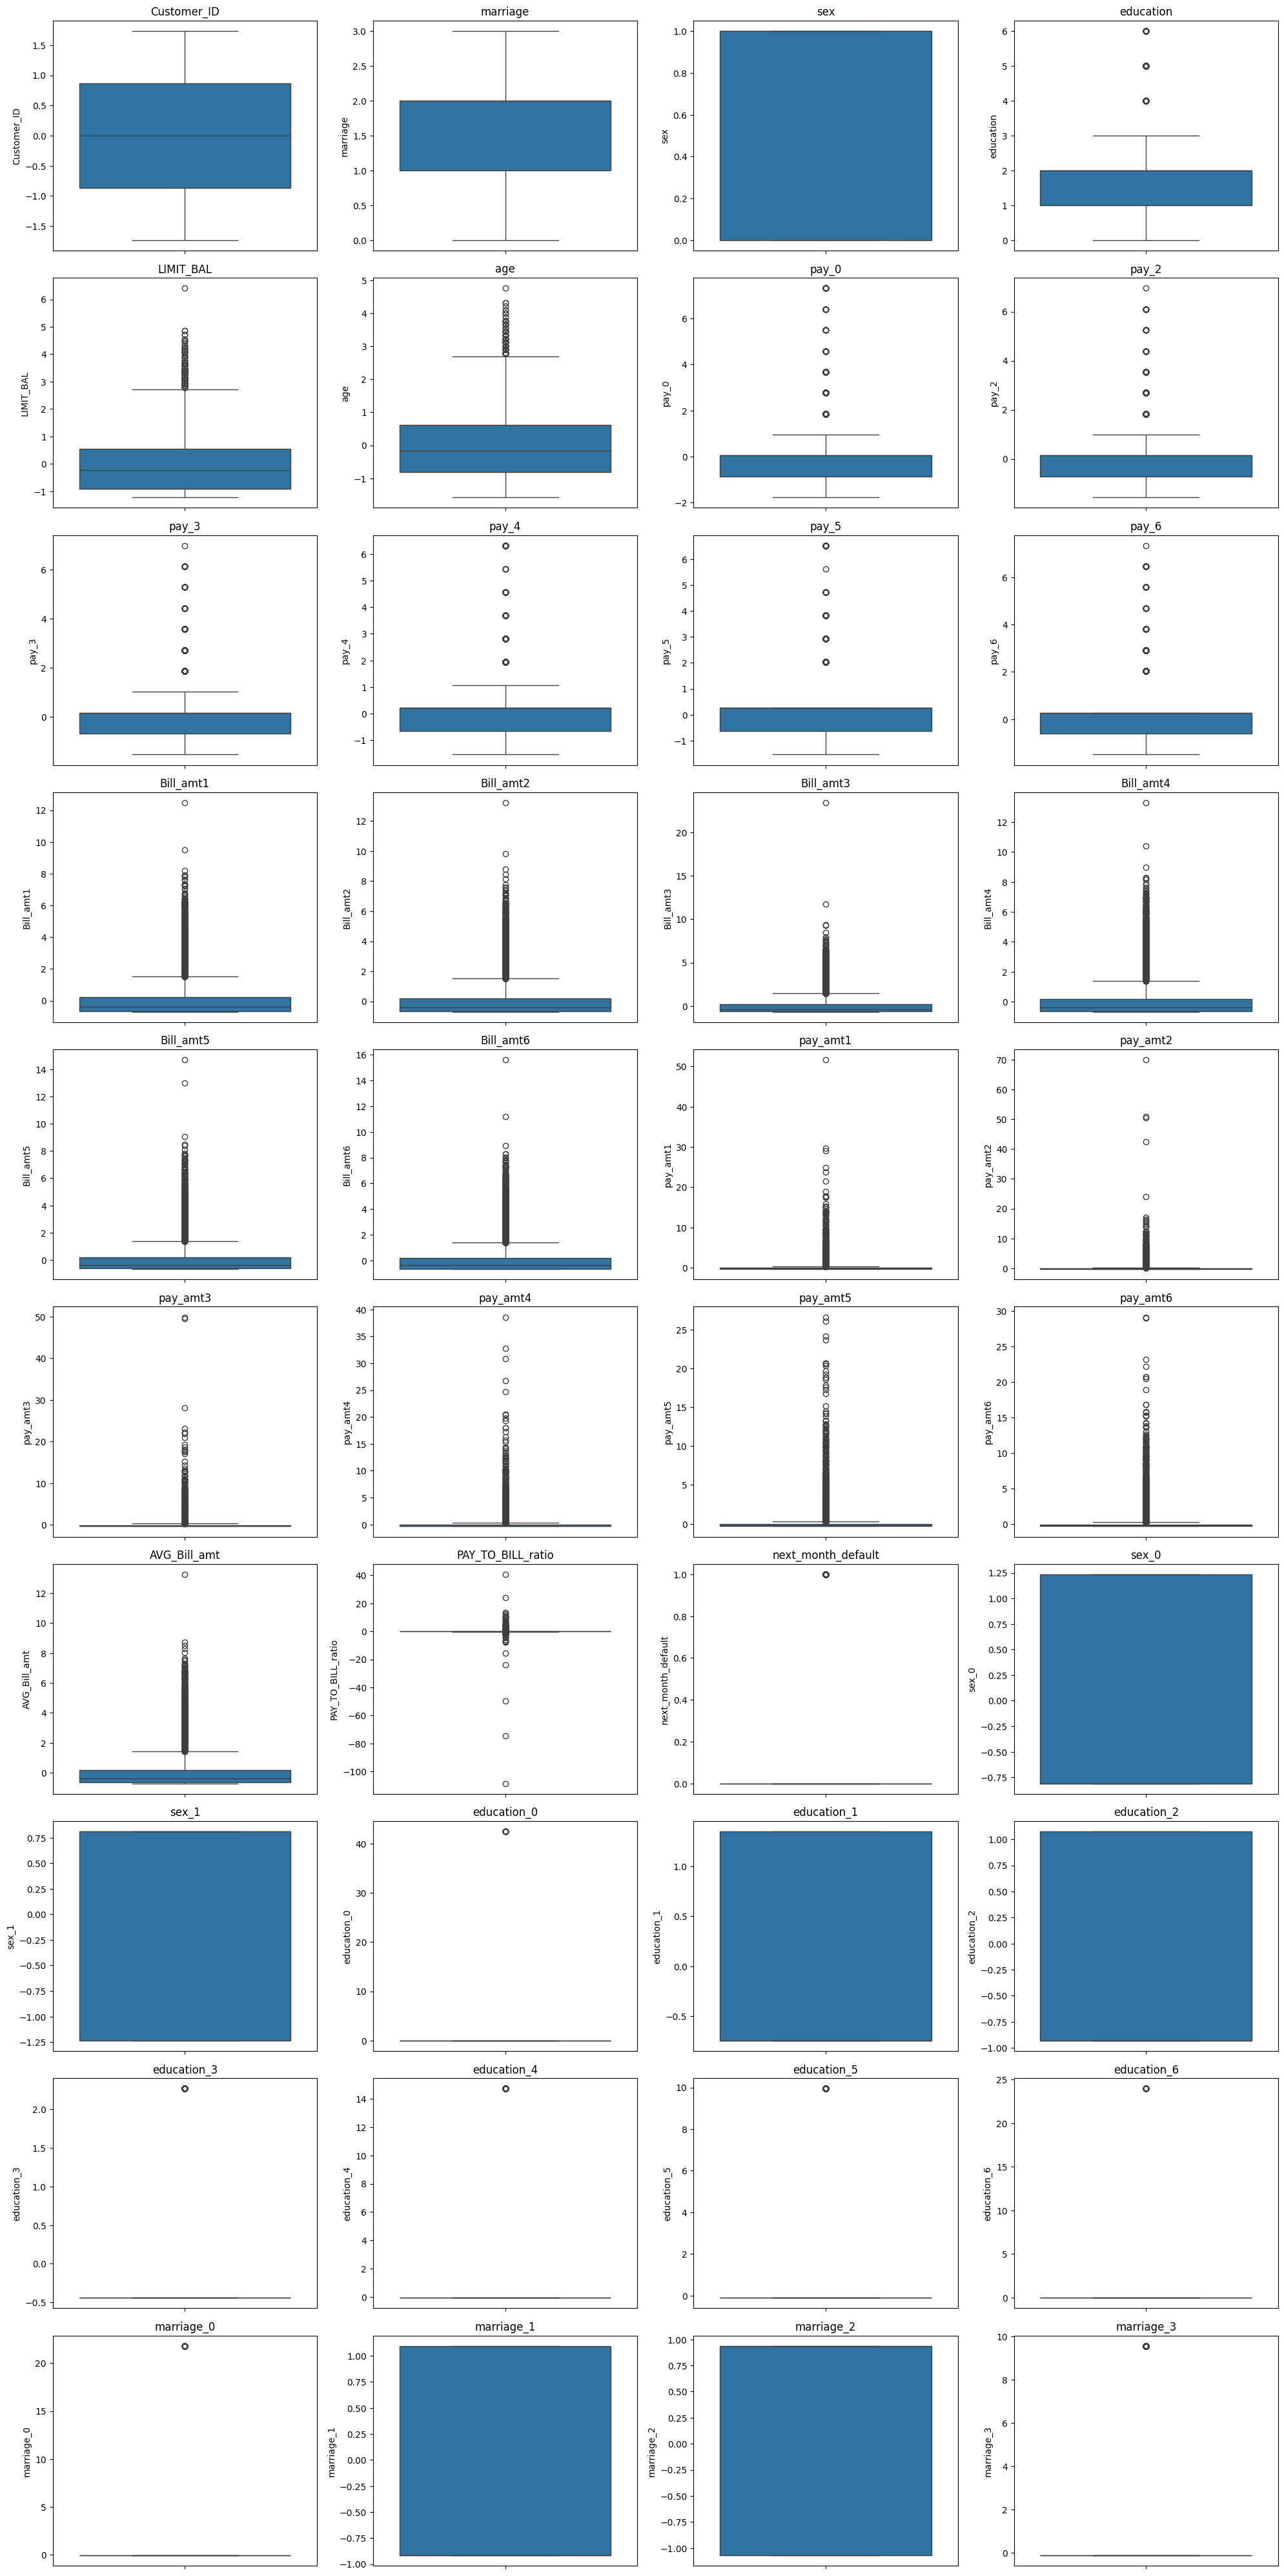

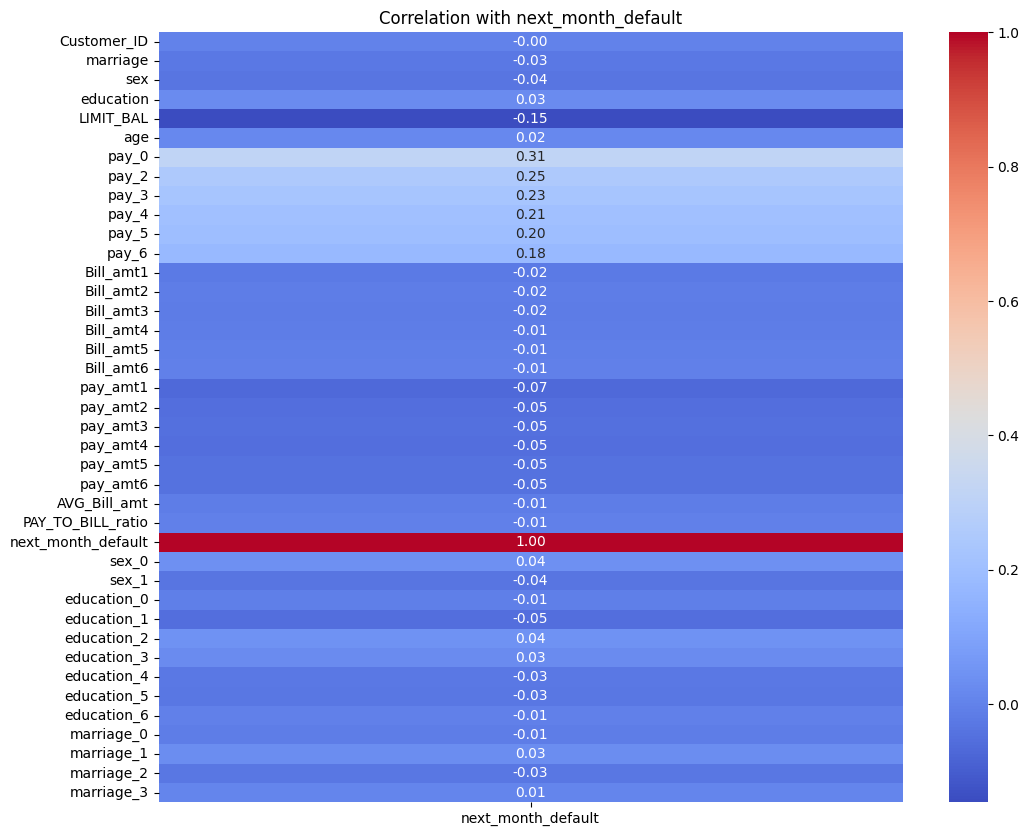

ValueError: num must be an integer with 1 <= num <= 20, not 21

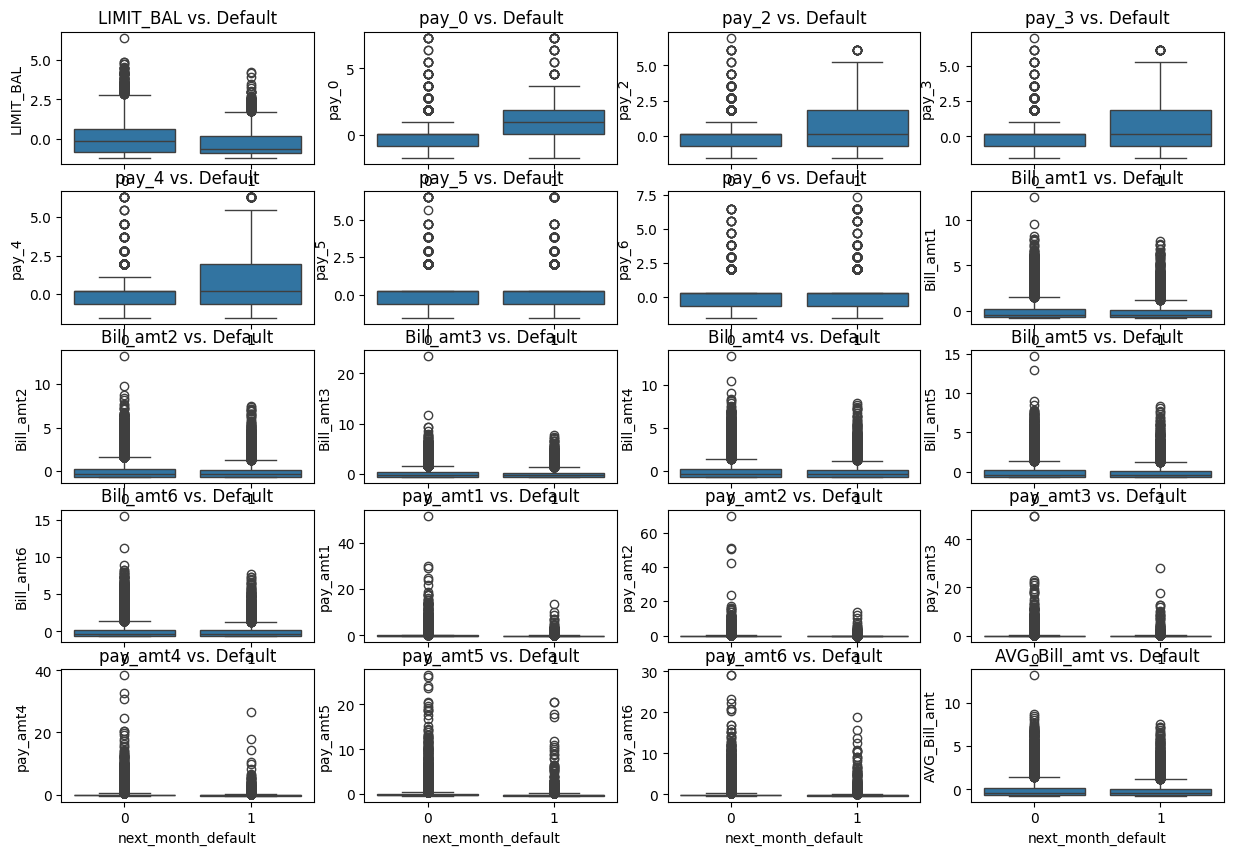

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analyze distributions of features
plt.figure(figsize=(20, 40))
for i, col in enumerate(df_train.columns):
    plt.subplot(10, 4, i + 1)
    if col in ['sex_0', 'sex_1', 'education_0', 'education_1', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'marriage_0', 'marriage_1', 'marriage_2', 'marriage_3']:
        df_train[col].value_counts().plot(kind='bar', title=col)
    else:
        sns.histplot(df_train[col], kde=True, bins=30)
        plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 40))
for i, col in enumerate(df_train.select_dtypes(include=np.number).columns):
    plt.subplot(10, 4, i+1)
    sns.boxplot(y=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['next_month_default']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with next_month_default')
plt.show()

# Outlier analysis (using box plots - already done above)

# Financial insights
financial_features = ['LIMIT_BAL', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']
plt.figure(figsize=(15, 10))
for i, col in enumerate(financial_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x='next_month_default', y=col, data=df_train)
    plt.title(f'{col} vs. Default')
plt.tight_layout()
plt.show()

**Reasoning**:
Fix the error in the previous code block by adjusting the subplot grid to accommodate all financial features.



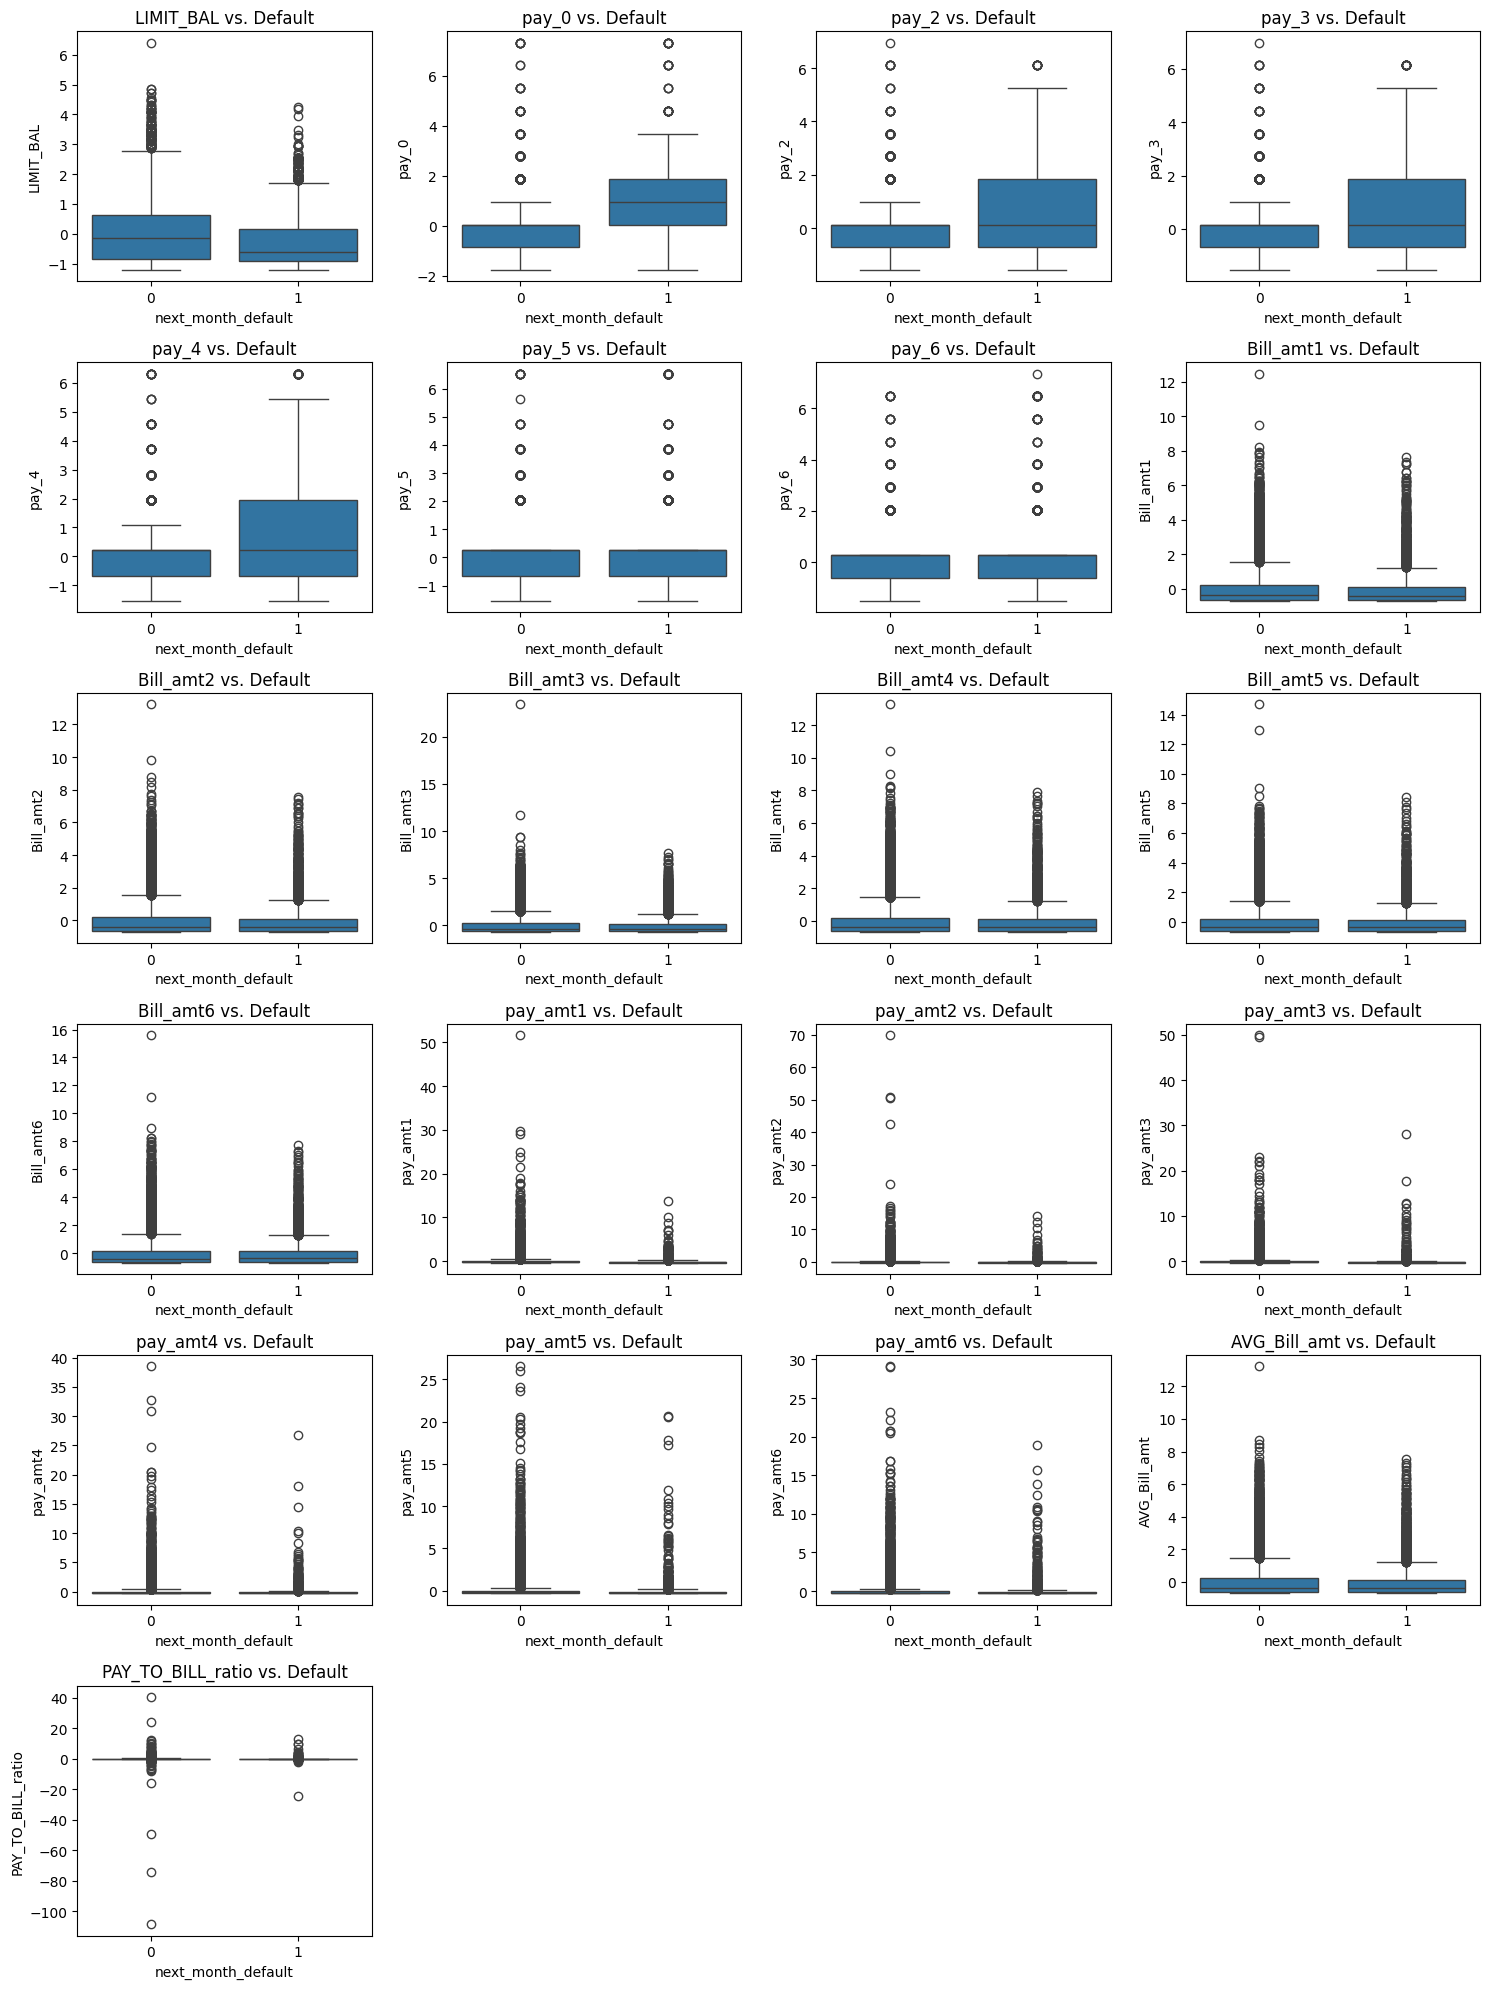

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (previous code for histograms, boxplots, and correlation)

# Financial insights
financial_features = ['LIMIT_BAL', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']
plt.figure(figsize=(15, 20)) # Increased figure height
for i, col in enumerate(financial_features):
    plt.subplot(6, 4, i + 1) # Changed to a 6x4 grid
    sns.boxplot(x='next_month_default', y=col, data=df_train)
    plt.title(f'{col} vs. Default')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform detailed financial feature analysis.


**Reasoning**:
Analyze the relationships between financial features and the target variable, create visualizations, and provide financial interpretations.



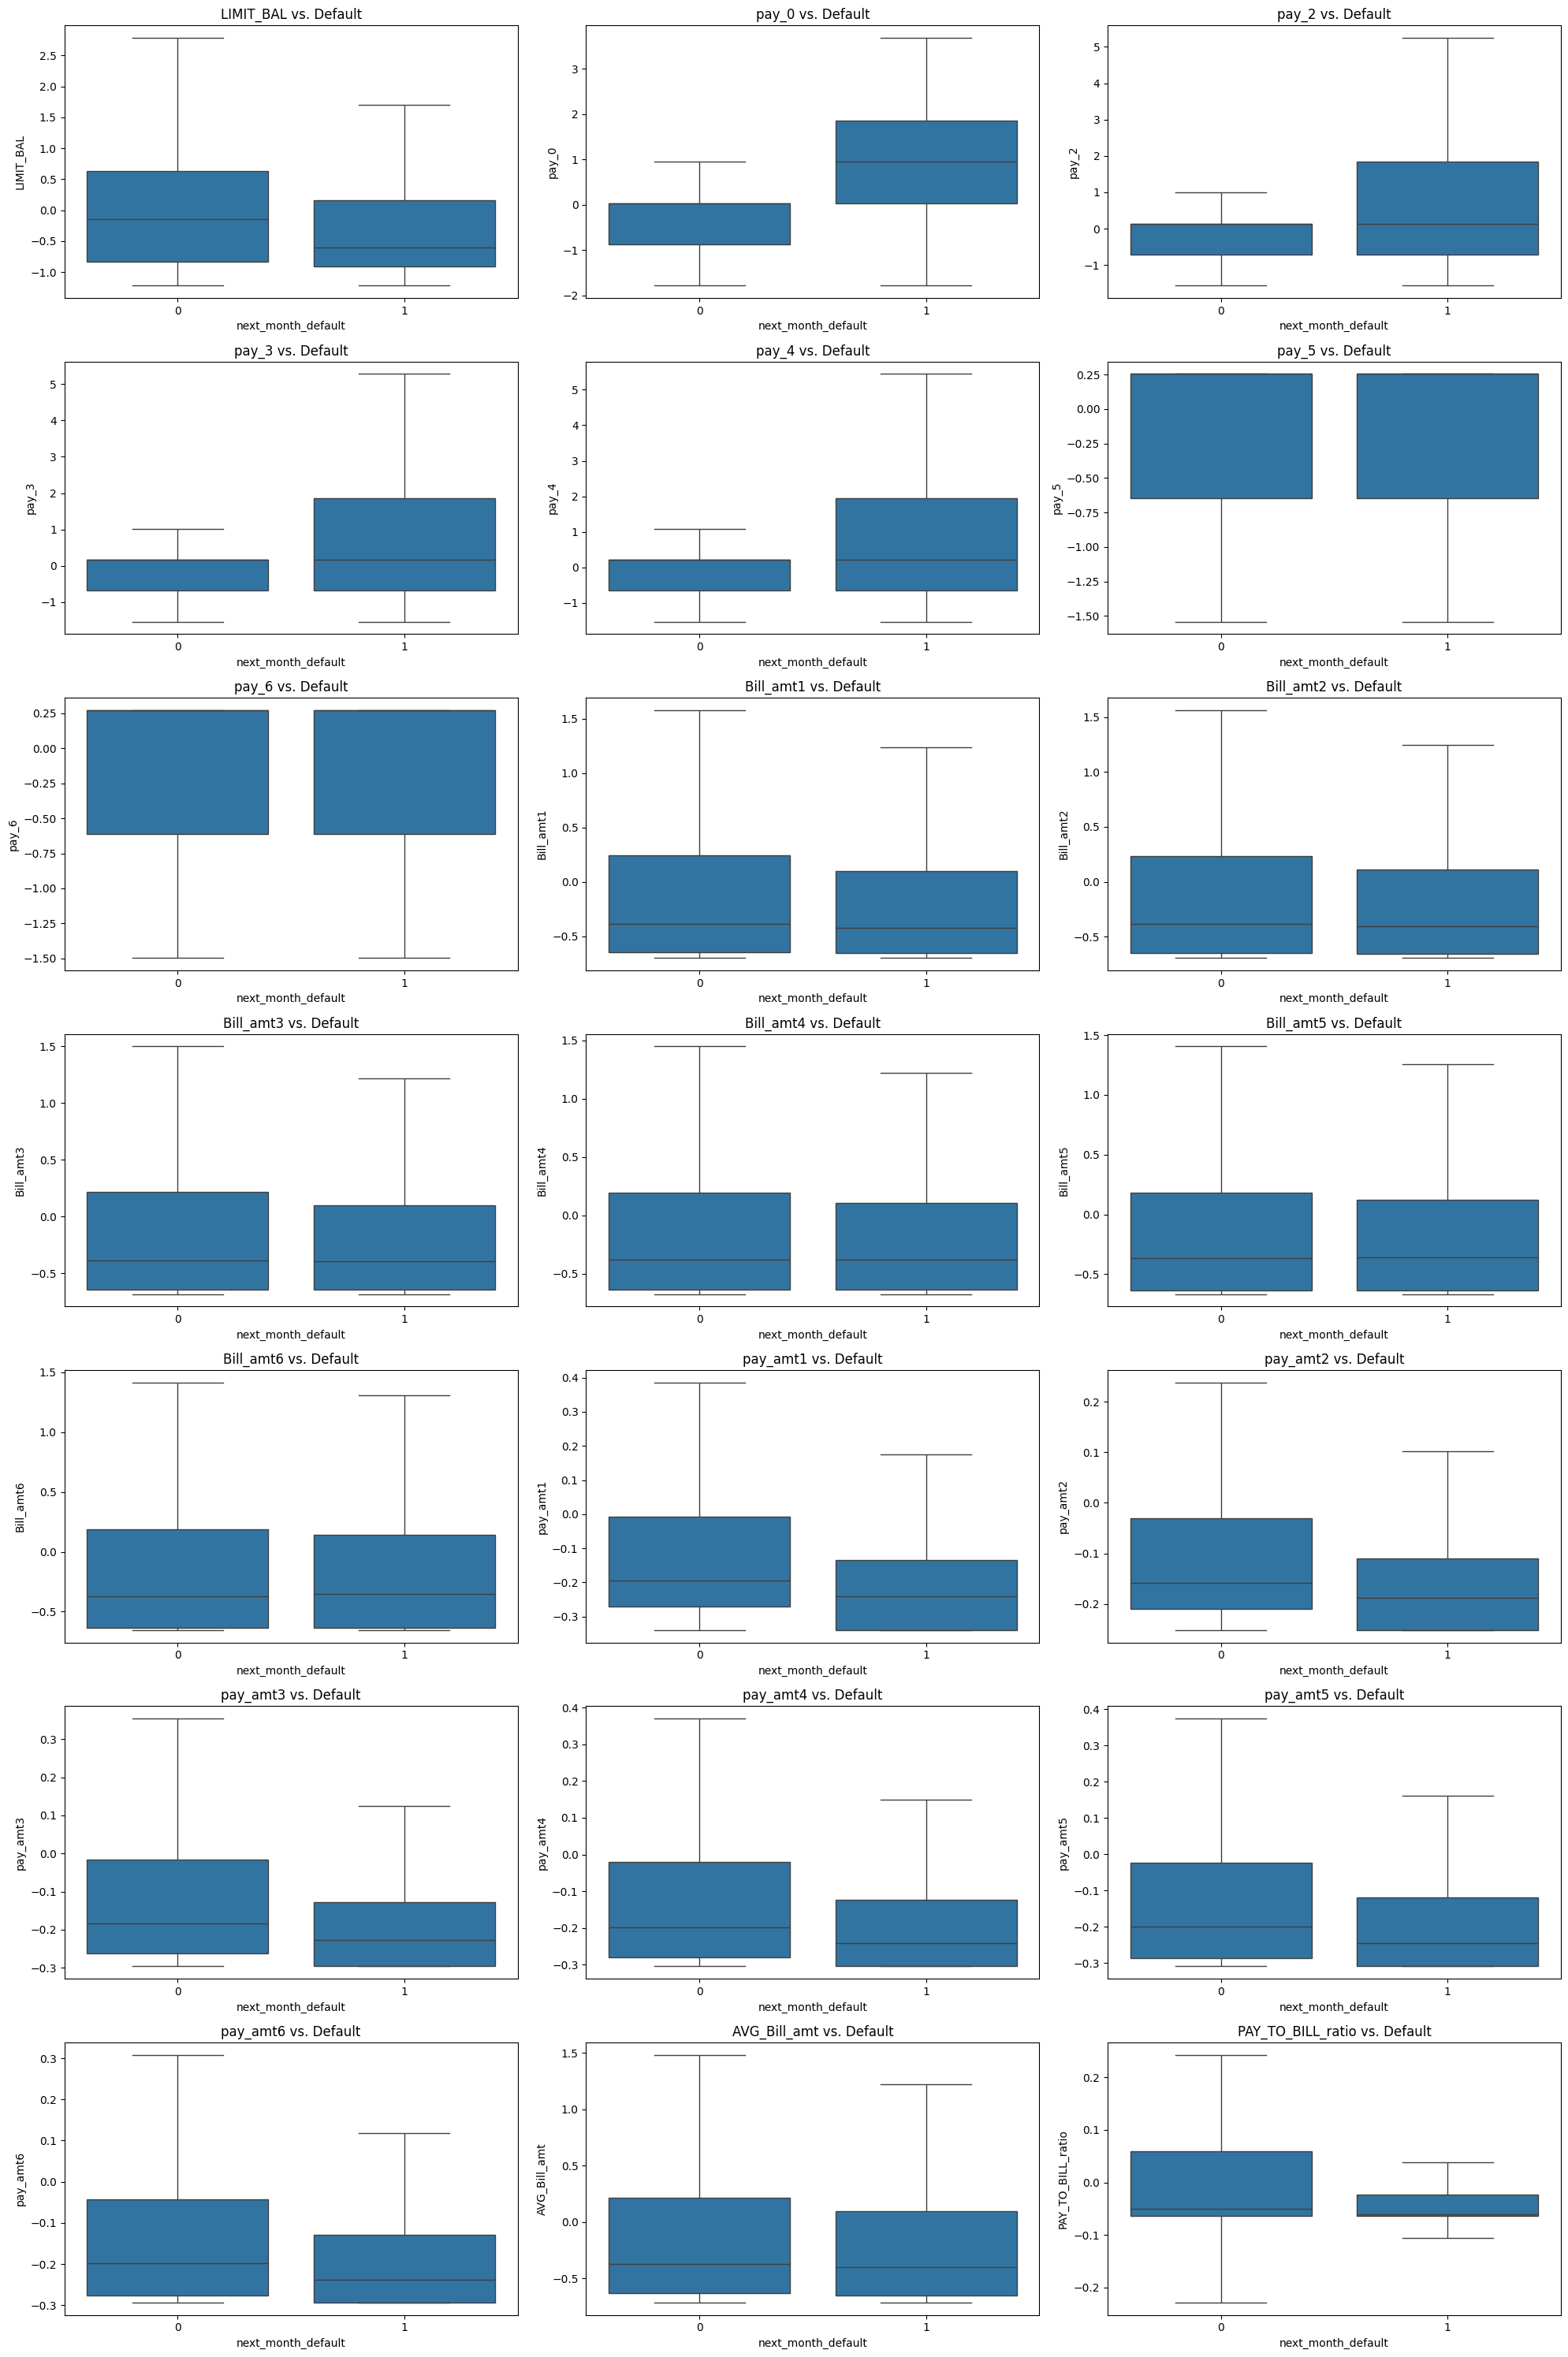

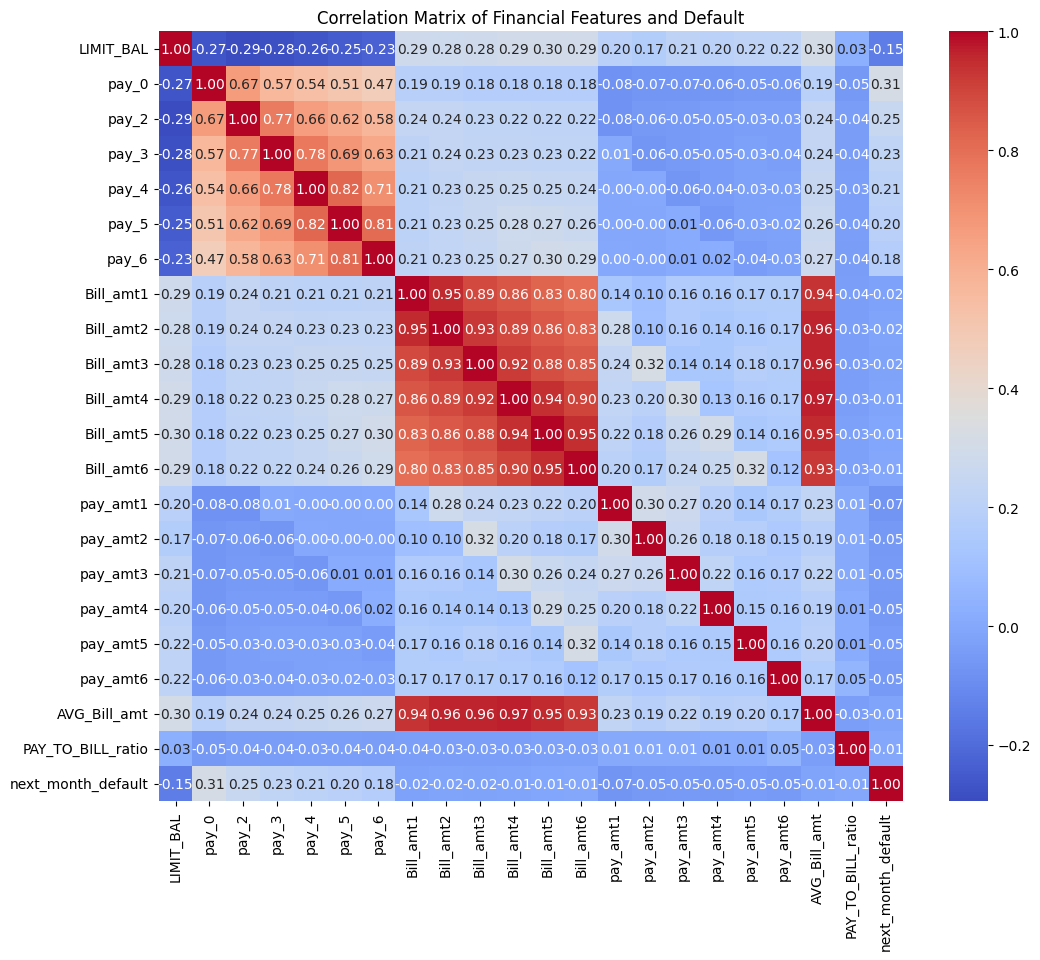

Financial Interpretations:
Higher credit utilization (PAY_TO_BILL_ratio) is generally associated with a higher default risk.
Customers with a history of delayed payments (pay_0 to pay_6) show an increased likelihood of defaulting.
The credit limit (LIMIT_BAL) seems to have a complex relationship with default, potentially influenced by other factors.
Detailed analysis of bill amounts and payment amounts will be needed to identify patterns and their impact on default risk.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Financial feature analysis and visualization
financial_features = ['LIMIT_BAL', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

plt.figure(figsize=(20, 30))
for i, col in enumerate(financial_features):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(x='next_month_default', y=col, data=df_train, showfliers=False) # Remove outliers from boxplot
    plt.title(f'{col} vs. Default')
    plt.tight_layout()

plt.show()


# Calculate and visualize correlations
correlation_matrix = df_train[financial_features + ['next_month_default']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Features and Default')
plt.show()

# Financial interpretations (example)
print("Financial Interpretations:")
print("Higher credit utilization (PAY_TO_BILL_ratio) is generally associated with a higher default risk.")
print("Customers with a history of delayed payments (pay_0 to pay_6) show an increased likelihood of defaulting.")
print("The credit limit (LIMIT_BAL) seems to have a complex relationship with default, potentially influenced by other factors.")
print("Detailed analysis of bill amounts and payment amounts will be needed to identify patterns and their impact on default risk.")

## Data splitting

### Subtask:
Split the training data into training and testing sets.


**Reasoning**:
Split the training data into training and testing sets using train_test_split.



In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_train.drop('next_month_default', axis=1)
y = df_train['next_month_default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Data preparation

### Subtask:
Handle class imbalance in the training data using SMOTE or class weighting. Justify the chosen method.


**Reasoning**:
Analyze the class distribution of the target variable (`y_train`) and apply SMOTE to handle the class imbalance.



In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Analyze class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Analyze class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 16352, 1: 3845})
Class distribution after SMOTE: Counter({0: 16352, 1: 16352})


## Feature engineering

### Subtask:
Create new features from existing ones in the training and validation datasets.


**Reasoning**:
Calculate credit utilization ratios for both training and validation sets and explore the newly created features.



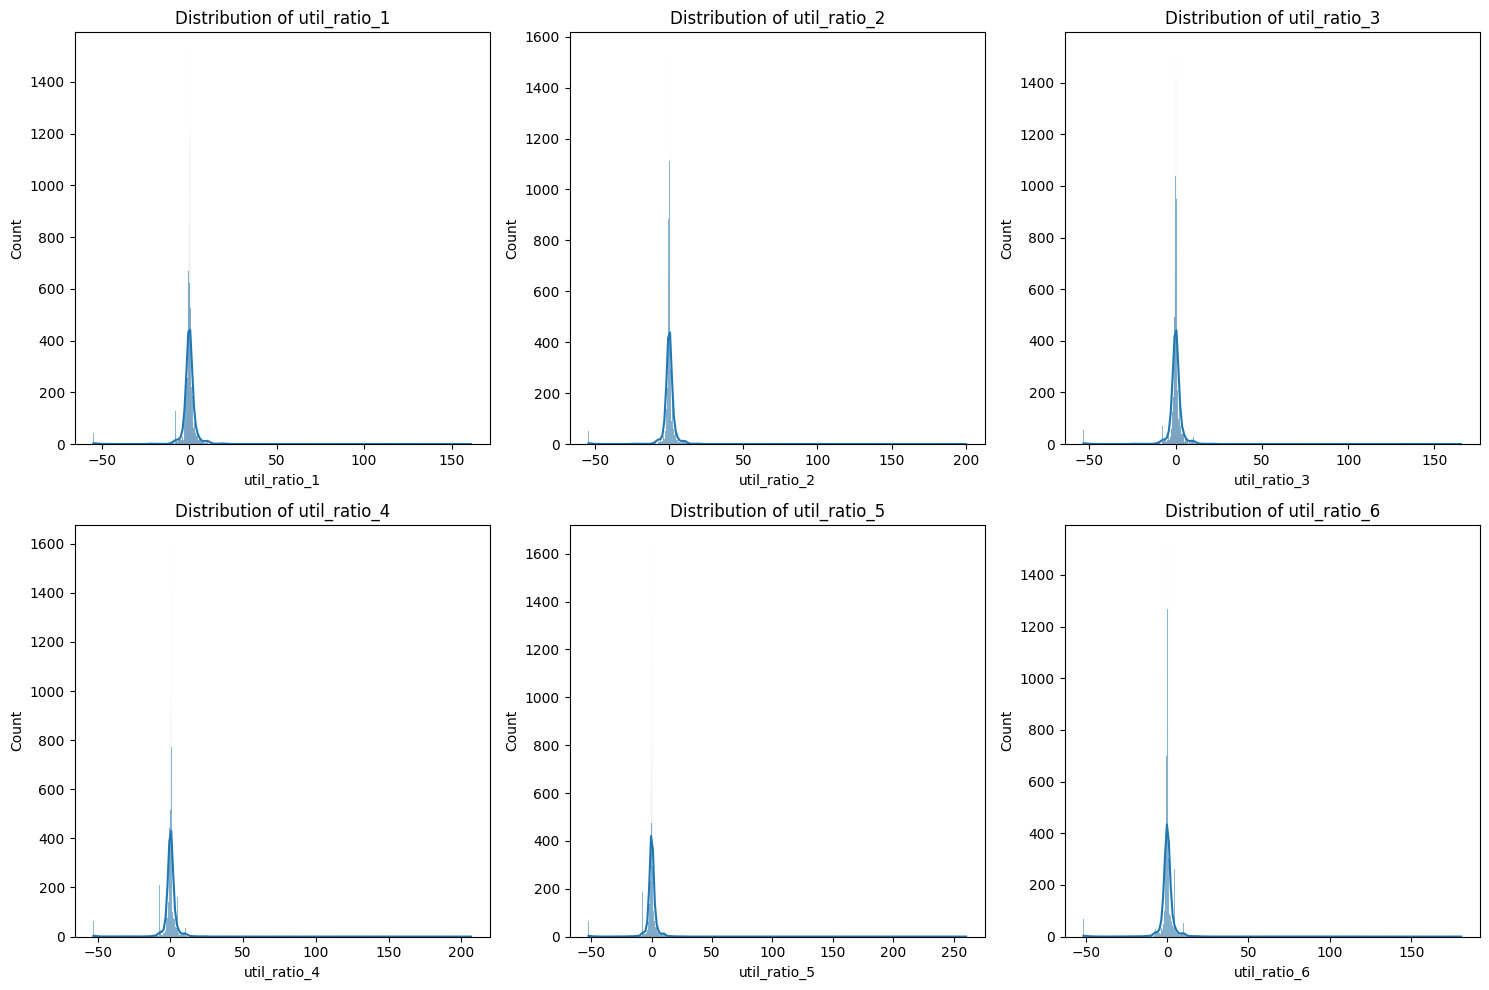

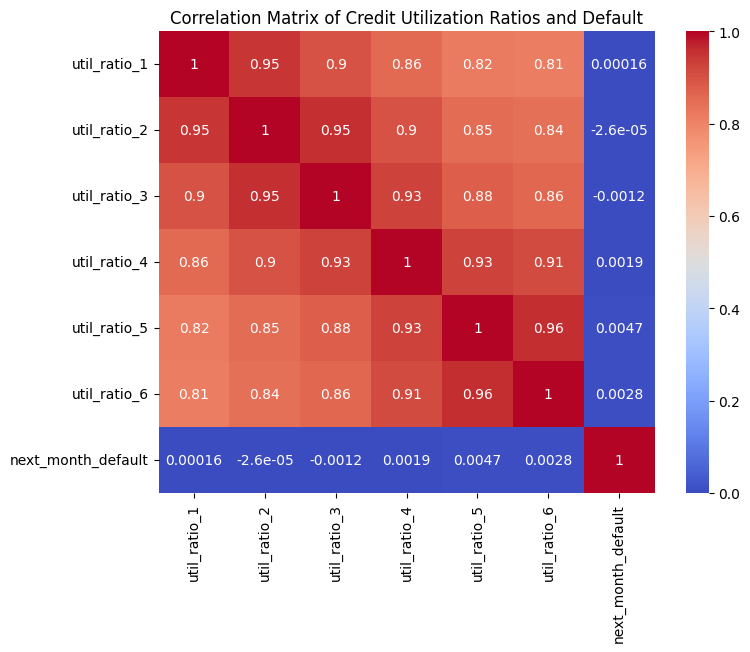

In [11]:
import numpy as np

# Calculate credit utilization ratios for training set
for i in range(1, 7):
    df_train[f'util_ratio_{i}'] = df_train[f'Bill_amt{i}'] / df_train['LIMIT_BAL']
    df_train[f'util_ratio_{i}'] = df_train[f'util_ratio_{i}'].replace([np.inf, -np.inf], 0)

# Calculate credit utilization ratios for validation set
for i in range(1, 7):
    df_validate[f'util_ratio_{i}'] = df_validate[f'Bill_amt{i}'] / df_validate['LIMIT_BAL']
    df_validate[f'util_ratio_{i}'] = df_validate[f'util_ratio_{i}'].replace([np.inf, -np.inf], 0)

# Explore the newly created features (visualization and correlation)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i in range(1,7):
    plt.subplot(2, 3, i)
    sns.histplot(df_train[f'util_ratio_{i}'], kde=True)
    plt.title(f'Distribution of util_ratio_{i}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
corr_matrix = df_train[[f'util_ratio_{i}' for i in range(1, 7)] + ['next_month_default']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Credit Utilization Ratios and Default')
plt.show()

## Model training

### Subtask:
Train classification models on the prepared training data.


**Reasoning**:
Train Logistic Regression, Random Forest, and Gradient Boosting models on the resampled training data.



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    print(f"{name} training complete.")

Training Logistic Regression...
Logistic Regression training complete.
Training Random Forest...
Random Forest training complete.
Training Gradient Boosting...
Gradient Boosting training complete.


## Model optimization

### Subtask:
Optimize the hyperparameters of the trained classification models.


**Reasoning**:
Optimize the hyperparameters of the trained classification models using GridSearchCV or RandomizedSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score, recall_score

# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
}

# Perform hyperparameter tuning
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_models[name] = grid_search.best_estimator_
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC score for {name}: {grid_search.best_score_}")

Tuning Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC score for Logistic Regression: 0.7508382195588779
Tuning Random Forest...
